## Import the data

The raw data set is imported into the project environment using pandas csv reader function. The data is visualized and has five charcter which includes, body_mass_kg, wing_length_m, beak_length_mm, beak_depth_mm and species.   

In [29]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"C:\Users\kv22535\Downloads\BIOLM35_Advanced_programming_2228819\puffins.csv")
data


,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm,species
0,4.0,0.2,39.3,19.4,Arctica
1,3.1,0.2,38.6,18.3,Arctica
2,3.7,0.2,40.8,16.7,Arctica
3,4.5,0.2,41.5,17.9,Arctica
4,3.3,0.2,42.3,17.1,Arctica
...,...,...,...,...,...
339,4.6,0.2,47.5,12.8,Corniculata
340,5.5,0.2,46.6,15.3,Corniculata
341,5.0,0.2,48.3,14.2,Corniculata
342,5.1,0.2,48.9,14.5,Corniculata


## Data cleaning     

The data is visualized and it is noticed that some columns are missng from the dataset. Hence, it is important to tidy the data. The result shows there are three (3) columns missing in body_mass_kg and wing_length_m while two (2) columns are missing in beak_length_mm and beak_depth_mm.

In [30]:
#Check if there are omisions in the dataset and how many columns have such

data.isnull().sum() 

body_mass_kg      3
wing_length_m     3
beak_length_mm    2
beak_depth_mm     2
species           0
dtype: int64

In [31]:
#Remove the columns and change the frame

data = data.dropna(how='any',axis=0)
data

,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm,species
0,4.0,0.2,39.3,19.4,Arctica
1,3.1,0.2,38.6,18.3,Arctica
2,3.7,0.2,40.8,16.7,Arctica
3,4.5,0.2,41.5,17.9,Arctica
4,3.3,0.2,42.3,17.1,Arctica
...,...,...,...,...,...
339,4.6,0.2,47.5,12.8,Corniculata
340,5.5,0.2,46.6,15.3,Corniculata
341,5.0,0.2,48.3,14.2,Corniculata
342,5.1,0.2,48.9,14.5,Corniculata


In [32]:
#Verify that the omisions and empty columns are removed.

data.isnull().sum()

body_mass_kg      0
wing_length_m     0
beak_length_mm    0
beak_depth_mm     0
species           0
dtype: int64

## Correlation between the data features
After visualizing and cleaning the dataset, the correlation between between all the features is analysed using corr() on the dataframe and the library seaborn to plot a scatterplot of the datasets. 


In [38]:
data.corr()

,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm
body_mass_kg,1.000000,NaN,0.595209,-0.470838
wing_length_m,NaN,NaN,NaN,NaN
beak_length_mm,0.595209,NaN,1.000000,-0.235700
beak_depth_mm,-0.470838,NaN,-0.235700,1.000000


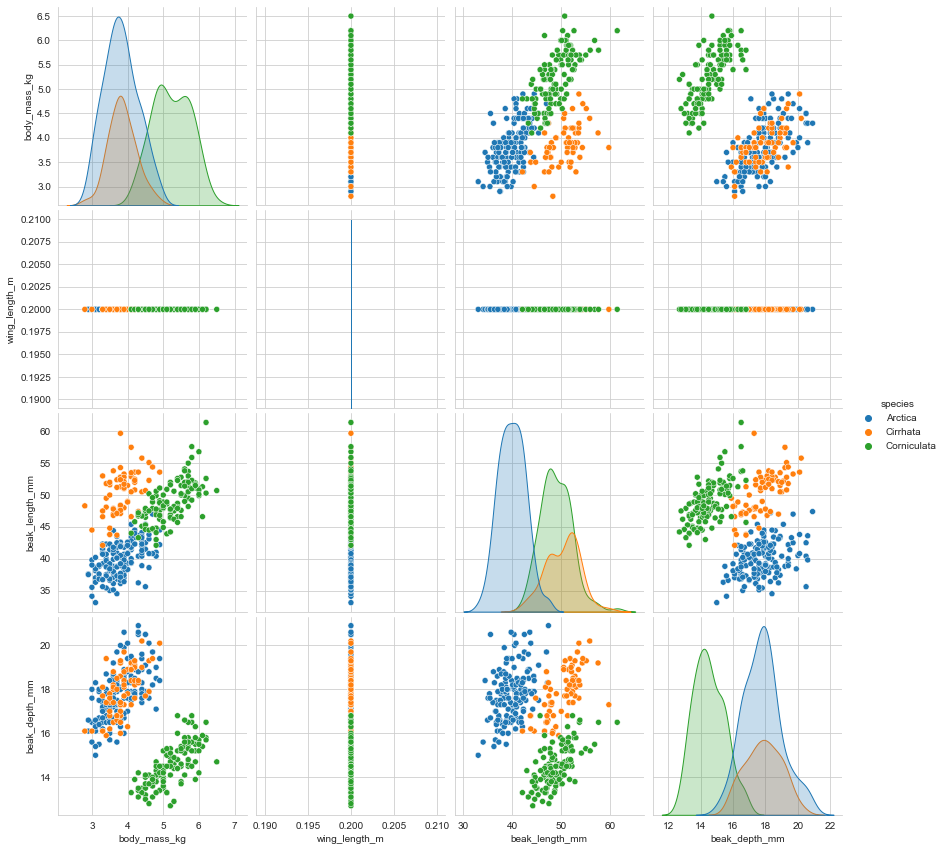

In [39]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data, hue='species', height=3);
plt.show()


## Fitting a model

### Dataframe

In [40]:
X = data[["body_mass_kg", "wing_length_m","beak_length_mm","beak_depth_mm"]]
X

,body_mass_kg,wing_length_m,beak_length_mm,beak_depth_mm
0,4.0,0.2,39.3,19.4
1,3.1,0.2,38.6,18.3
2,3.7,0.2,40.8,16.7
3,4.5,0.2,41.5,17.9
4,3.3,0.2,42.3,17.1
...,...,...,...,...
339,4.6,0.2,47.5,12.8
340,5.5,0.2,46.6,15.3
341,5.0,0.2,48.3,14.2
342,5.1,0.2,48.9,14.5


In [42]:
y = data['species']
y


0          Arctica
1          Arctica
2          Arctica
3          Arctica
4          Arctica
          ...     
339    Corniculata
340    Corniculata
341    Corniculata
342    Corniculata
343    Corniculata
Name: species, Length: 340, dtype: object

### Spliting the data

This is where the data set is trained using the train_test_spilt model selection from sklearn. The data is splited into two which are train and test data. 

In [43]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)


In [ ]:
#train_X
#train_y

### Training the model

The is where the the model is trained to fit using the KNeighborsClassifier, chosing 5 as the optimum number of nearest neighbours to classify the data best.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)

KNeighborsClassifier()

### Testing

Now that we have built a model, we can check the accuracy using the score() method, the test data are used as parameter. 

In [45]:
model.score(test_X, test_y)

0.9882352941176471

## Overview

After visualizing the dataset that is read in using read.csv() method,  the correlation result shows how the different features correlate to each other. It is observed from the result that;

The wing_length remains constant in relation to other data feature, this is because the values are unchanged all through the data.

The bodymass doesn't seem to have a good distribution as it is difficult to read the differences making it not suitable for identifying the species.

The beakdepth is also not seen to be a good feature as the distribution is clustered and not well distinguished. 

The beaklength is seen to be distinctly distributed and easy to identify as a very good feature for identifying the species. 

The KNeighborsClassifier perfectly fit the data and resulted to 98% accuracy which confirms it as best for the data.